* shift + tab => docstring

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plot inline
%matplotlib inline
sns.set(color_codes=True)

### Read dataframe, inspect head, tail

In [2]:
df = pd.read_csv('data/2019-Nov.csv')
df.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [3]:
df.tail(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4635832,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47 UTC,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47 UTC,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57 UTC,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063
4635836,2019-11-30 23:59:58 UTC,view,5880201,2029731308699124089,NaN,rasyan,3.76,579969854,e9fa2c3e-8c9e-448c-880a-21ca57c18b3b


### Inspect data types in each column

In [4]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

### Total number of rows, columns

In [5]:
df.shape

(4635837, 9)

### Find duplicates and remove them

In [6]:
df_duplicates = df[df.duplicated()]
print(f'duplicate rows {df_duplicates.shape}')

duplicate rows (246693, 9)


In [7]:
df = df.drop_duplicates()

### Investigate null values

In [8]:
print(df.isnull().sum())

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4315582
brand            1879959
price                  0
user_id                0
user_session         755
dtype: int64


### Investigate outliers

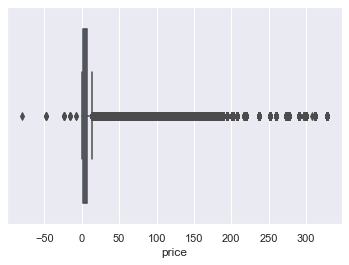

In [9]:
sns.boxplot(x=df['price'])

#### Negative price events, find out what this means

In [10]:
df_is_price_neg = df['price'] < 0
print(df_is_price_neg)

0          False
1          False
2          False
3          False
4          False
           ...  
4635832    False
4635833    False
4635834    False
4635835    False
4635836    False
Name: price, Length: 4389144, dtype: bool


In [11]:
df_price_neg = df[df_is_price_neg]
df_price_neg.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
73174,2019-11-01 15:36:23 UTC,purchase,5716855,1487580014042939619,NaN,NaN,-7.94,566480066,34fa4291-9e2e-470f-a678-b84d9bbbdfe3
330623,2019-11-03 18:47:04 UTC,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,567194545,fd27b149-3006-41cd-8afc-884c47272e5d
408236,2019-11-04 11:54:29 UTC,purchase,5670257,1487580014042939619,NaN,NaN,-15.87,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015
408237,2019-11-04 11:54:29 UTC,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015
706884,2019-11-06 11:51:26 UTC,purchase,5670257,1487580014042939619,NaN,NaN,-15.87,568159131,8edce83b-2d4c-4654-89e6-16234303031c


In [12]:
df_price_neg.shape

(16, 9)

#### Negative prices are probably a data entry issue, we can convert these to positive

In [13]:
df_product_5716855 = df.query('product_id == 5716855')

#### Check if other entries with the same product id have negative price

In [14]:
df_product_5716855.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
73174,2019-11-01 15:36:23 UTC,purchase,5716855,1487580014042939619,NaN,NaN,-7.94,566480066,34fa4291-9e2e-470f-a678-b84d9bbbdfe3
3990421,2019-11-27 16:17:31 UTC,purchase,5716855,1487580014042939619,NaN,NaN,-7.94,395032118,dad52920-321a-4d0d-805e-e83ff813d994


In [15]:
df_product_5716859 = df.query('product_id == 5716859')

In [16]:
df_product_5716859.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
330623,2019-11-03 18:47:04 UTC,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,567194545,fd27b149-3006-41cd-8afc-884c47272e5d
2909975,2019-11-21 19:34:16 UTC,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,419166079,7e76a460-adb4-4e3f-9c85-c08a97016aa0
3093813,2019-11-22 13:46:53 UTC,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,540003383,33da1676-00df-4f21-b87e-4c1b9b09420c
3306219,2019-11-23 13:30:53 UTC,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,574878046,b60c5299-7a53-e636-6dc3-c7fd5d86452b


### Fix negative price by applying abs function

In [17]:
df['price'] = df['price'].apply(lambda x: abs(x)) 

###  Inter Quartile Range (IQR) Score

In [18]:
Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: product_id     1.326570e+05
category_id    7.516192e+09
price          4.670000e+00
user_id        9.774198e+07
dtype: float64


In [19]:
IQR['price']

4.67

#### Removing outliers doesn't make sense for categories other than price, however price variability is expected in products

In [20]:
df_price_iqr = df[~((df['price'] < 1.5 * IQR['price']) | df['price'] > 1.5 * IQR['price'])]
df_price_iqr.shape

(4389144, 9)

In [21]:
df_price_iqr.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
6,2019-11-01 00:00:25 UTC,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
7,2019-11-01 00:00:32 UTC,view,5837835,1933472286753424063,NaN,NaN,3.49,514649199,432a4e95-375c-4b40-bd36-0fc039e77580
8,2019-11-01 00:00:34 UTC,remove_from_cart,5870838,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
9,2019-11-01 00:00:37 UTC,view,5870803,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
10,2019-11-01 00:00:42 UTC,remove_from_cart,5870803,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a


#### Over 200,000 rows removed that aren't in the IQR range. It is expected that product items will have higher and lower ranges. We should keep this data

### Histogram of product IDs

Text(0, 0.5, 'Qty Sold')

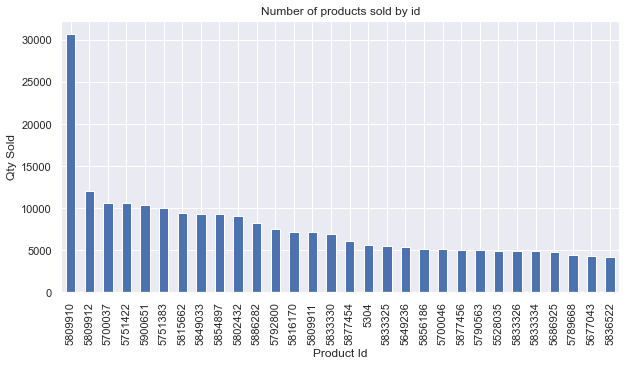

In [22]:
df.product_id.value_counts().nlargest(30).plot(kind='bar', figsize=(10,5))
plt.title('Number of products sold by id')
plt.xlabel('Product Id')
plt.ylabel('Qty Sold')

In [23]:
df.query('product_id == 5809910').head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
122,2019-11-01 00:09:44 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,249305749,e707213f-7920-49e5-9386-55e3a516e069
127,2019-11-01 00:10:12 UTC,cart,5809910,1602943681873052386,NaN,grattol,5.24,249305749,e707213f-7920-49e5-9386-55e3a516e069
414,2019-11-01 00:31:47 UTC,purchase,5809910,1602943681873052386,NaN,grattol,5.24,249305749,e707213f-7920-49e5-9386-55e3a516e069
794,2019-11-01 00:54:05 UTC,cart,5809910,1602943681873052386,NaN,grattol,5.24,541607447,b5312b6e-f75a-49e3-bd59-0d9a8b3d7482
1676,2019-11-01 01:47:39 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,455571231,9b2feeb4-805c-4d2b-aac1-57d9f3bd6f4d


### Histogram of brand: most sold brands - caveat: has a lot of null values

Text(0, 0.5, 'Qty Sold')

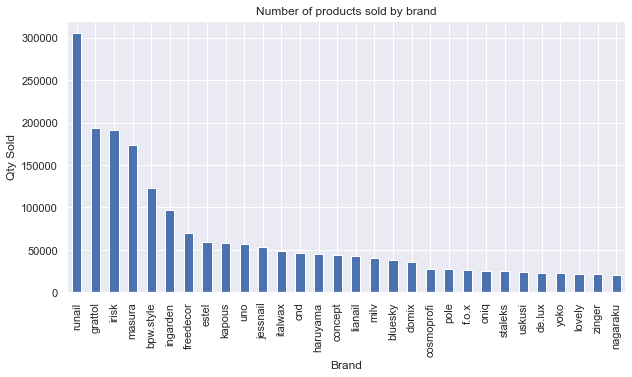

In [24]:
df.brand.value_counts().nlargest(30).plot(kind='bar', figsize=(10, 5))
plt.title('Number of products sold by brand')
plt.xlabel('Brand')
plt.ylabel('Qty Sold')

In [25]:
df.query('brand == "runail"').head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
6,2019-11-01 00:00:25 UTC,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
12,2019-11-01 00:00:50 UTC,view,5856190,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
15,2019-11-01 00:00:57 UTC,view,5674484,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
18,2019-11-01 00:01:09 UTC,cart,4607,1487580010796548183,NaN,runail,0.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
20,2019-11-01 00:01:11 UTC,cart,4600,1487580010796548183,NaN,runail,0.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


#### What are the prices of the best selling brands?

Text(0, 0.5, 'Qty sold')

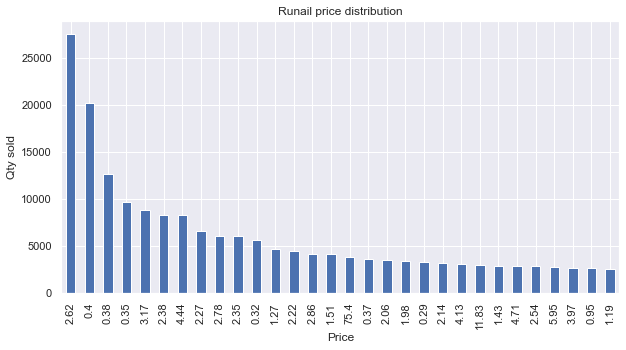

In [26]:
df.query('brand == "runail"').price.value_counts().nlargest(30).plot(kind='bar', figsize=(10, 5))
plt.title('Runail price distribution')
plt.xlabel('Price')
plt.ylabel('Qty sold')

Text(0, 0.5, 'Qty sold')

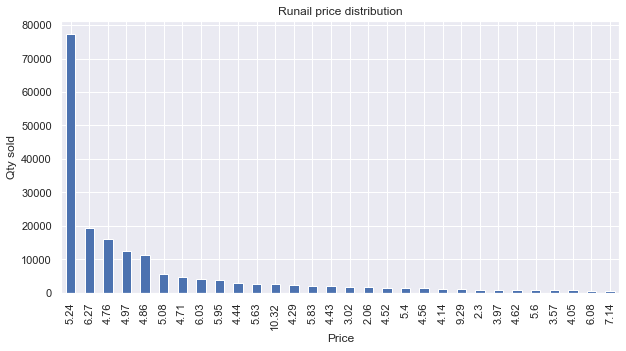

In [27]:
df.query('brand == "grattol"').price.value_counts().nlargest(30).plot(kind='bar', figsize=(10, 5))
plt.title('Runail price distribution')
plt.xlabel('Price')
plt.ylabel('Qty sold')

### Price aggregations

In [28]:
# Ignore the rows where prices are negative
max_cost = df.price.max()
min_cost = df.price.min()
mean_cost = df.price.mean()
print(f'most costly item sold costs {max_cost}, cheapeast cost {min_cost}, average price is {mean_cost}')

most costly item sold costs 327.78, cheapeast cost 0.0, average price is 8.308922432255583


#### Average price by brand and product category

In [45]:
df.groupby('brand')['price'].mean().sort_values(ascending=False)

brand
strong       197.288190
sanoto       138.424167
marathon     130.993905
dorena       108.863109
s.care        94.903914
                ...    
dermal         1.242728
bpw.style      1.150795
cosima         1.104545
supertan       0.940429
soleo          0.811444
Name: price, Length: 239, dtype: float64

In [46]:
df.groupby('category_id')['price'].mean().sort_values(ascending=False) 

category_id
2193074740619379535    167.624826
2187686850687140020    138.424167
2022622168218599898    127.618187
1487580006300255120    104.130579
1487580006585467807     92.793000
                          ...    
1487580010846879833      0.371202
1487580011115315300      0.360000
1487580011199201384      0.320000
1487580011140481125      0.320000
2166295400451933025      0.000000
Name: price, Length: 491, dtype: float64